In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

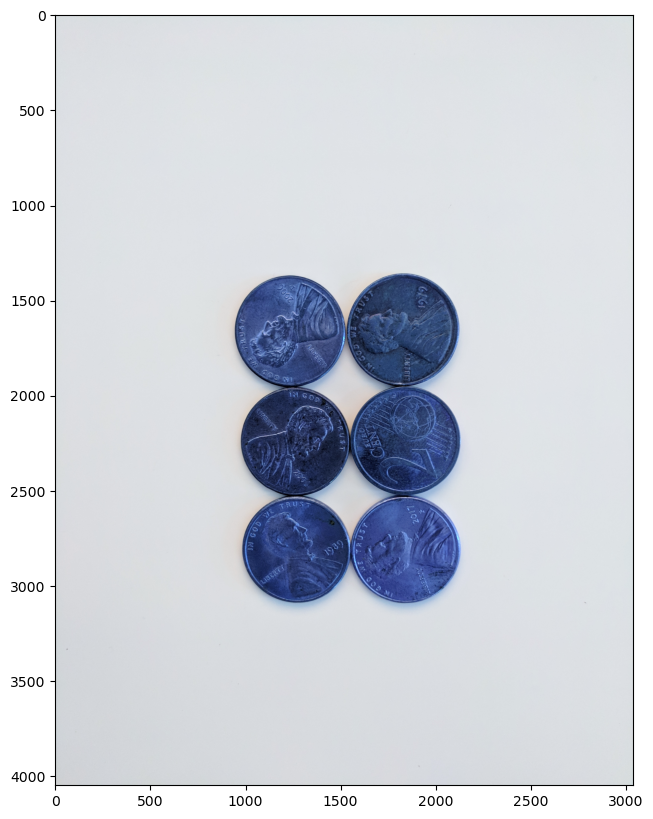

In [3]:
img = cv2.imread('../DATA/pennies.jpg')
display(img)

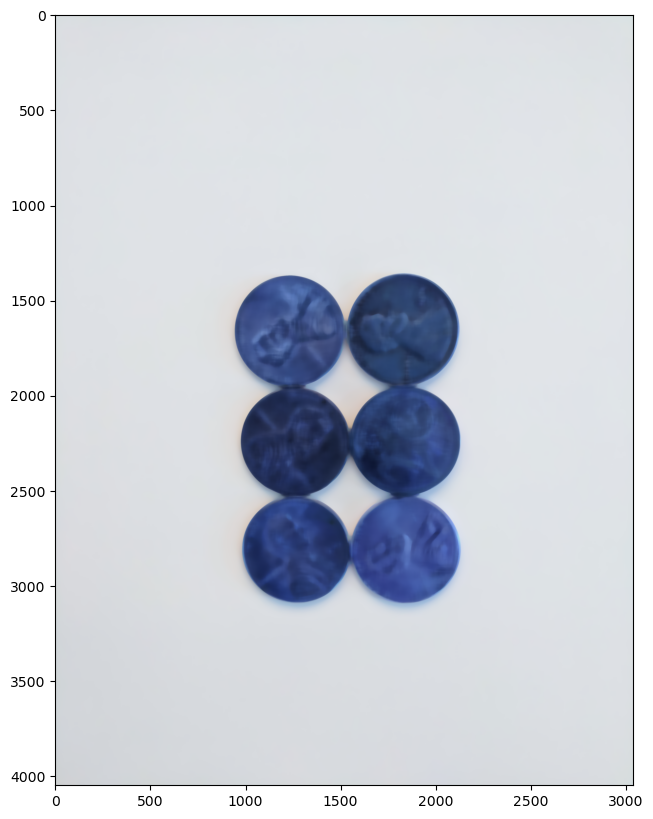

In [4]:
#Step 1 blur
img = cv2.medianBlur(img, 35)
display(img)


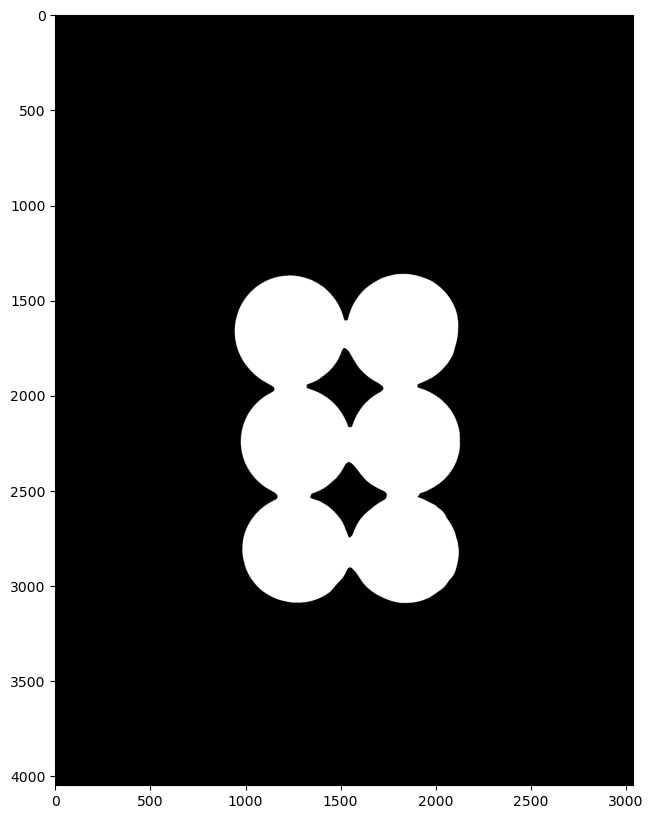

In [5]:
#Step 2 convert to gray and threshold (OTSU Methond)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
display(thresh)

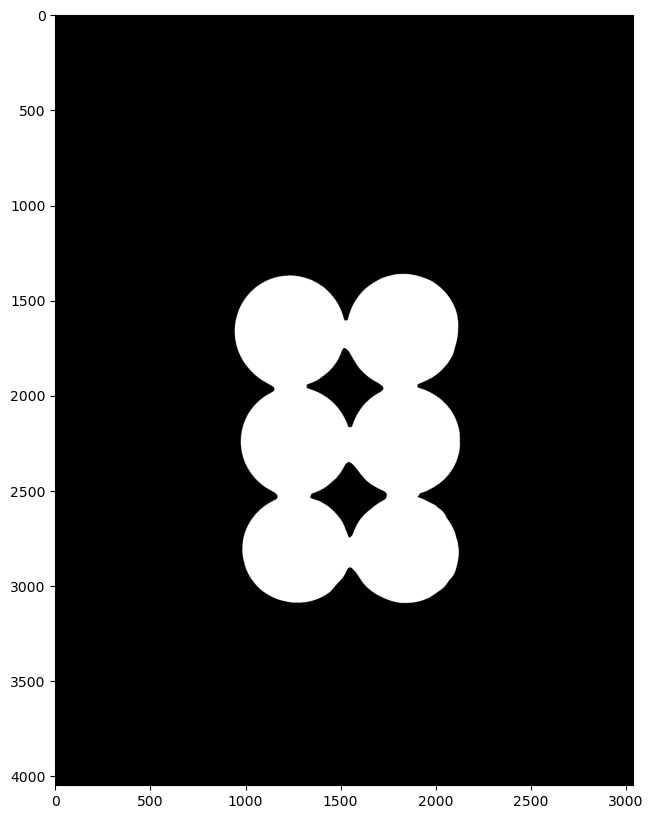

In [6]:
#Step 3 noise removal(optional)
kernel = np.ones((3,3), np.uint8)
sure_bg = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations =2)
display(sure_bg)

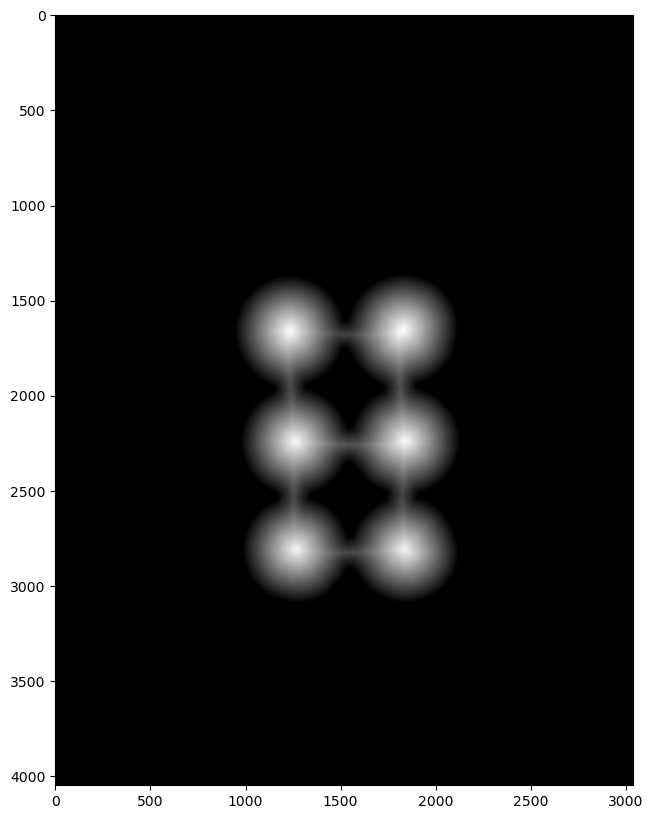

In [7]:
#Distance transformation
dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 5)
display(dist_transform)

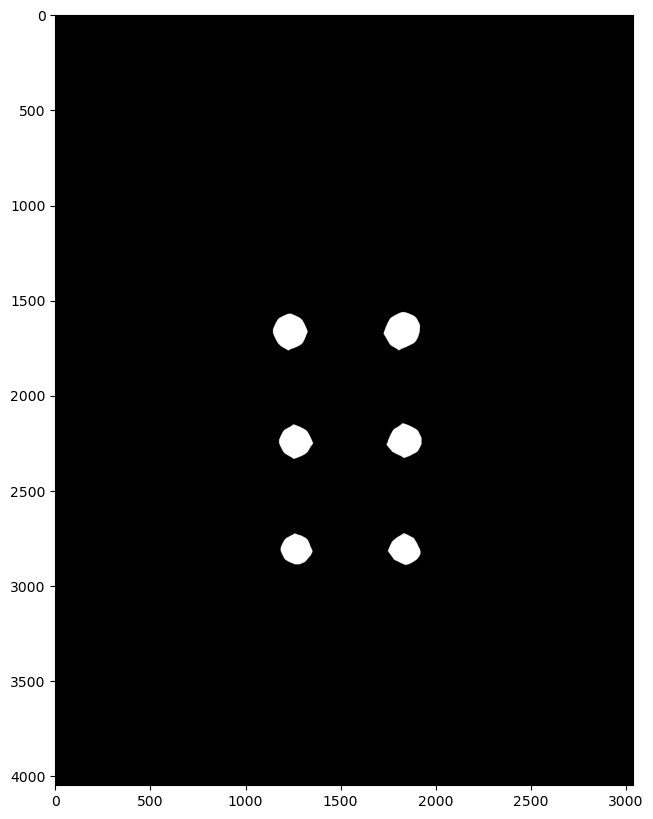

In [8]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
display(sure_fg)

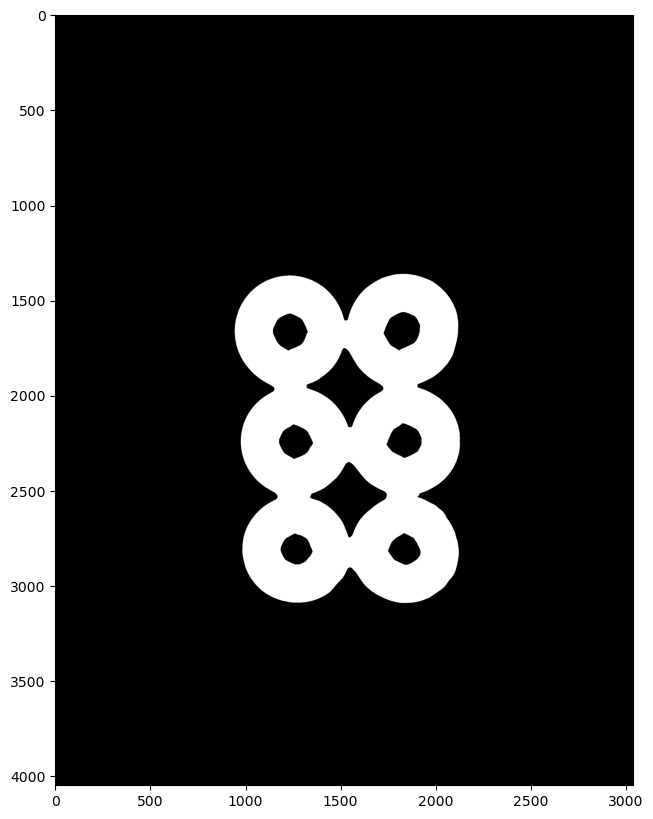

In [9]:
sure_fg = np.uint8(sure_fg)
unkown = cv2.subtract(sure_bg, sure_fg)
display(unkown)

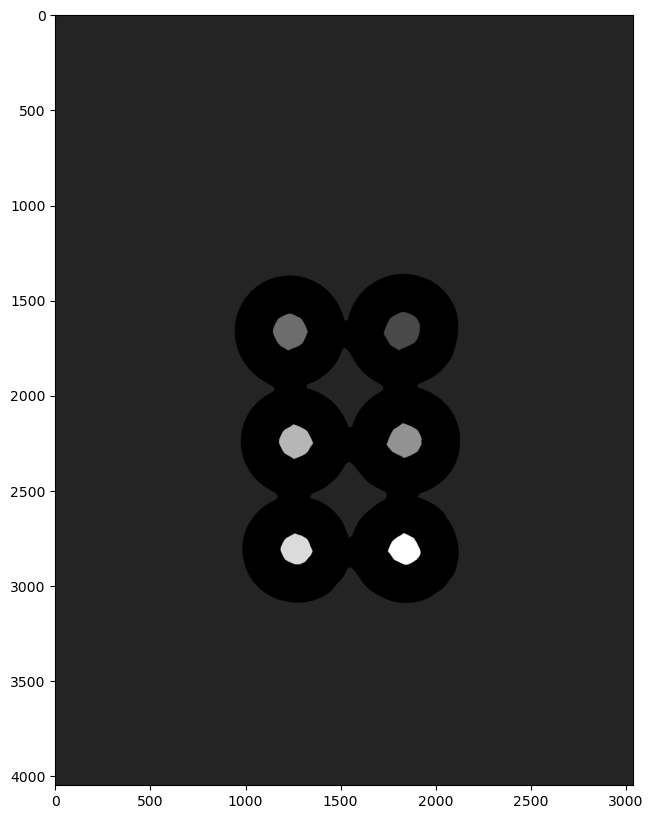

In [10]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unkown==255] = 0
display(markers)

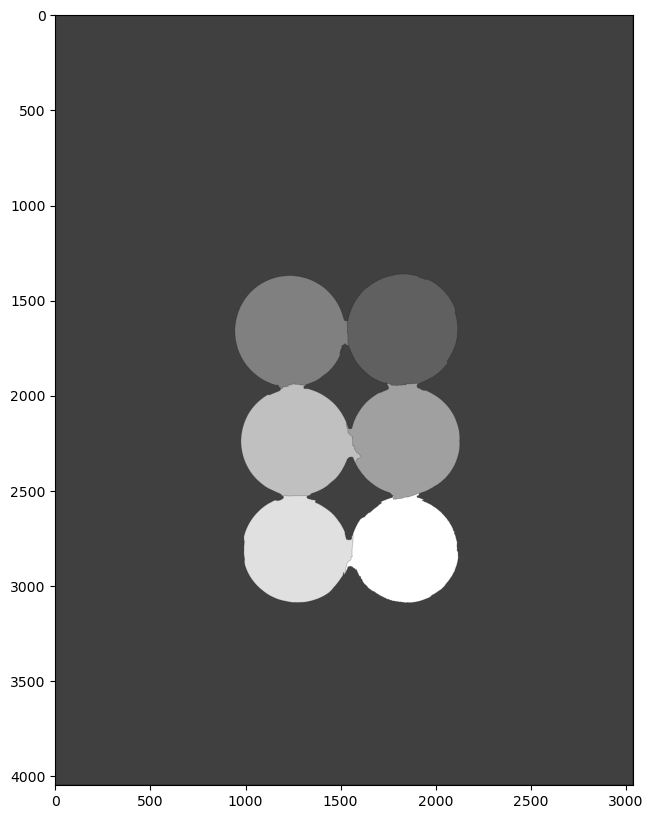

In [11]:
markers = cv2.watershed(img, markers)
display(markers)

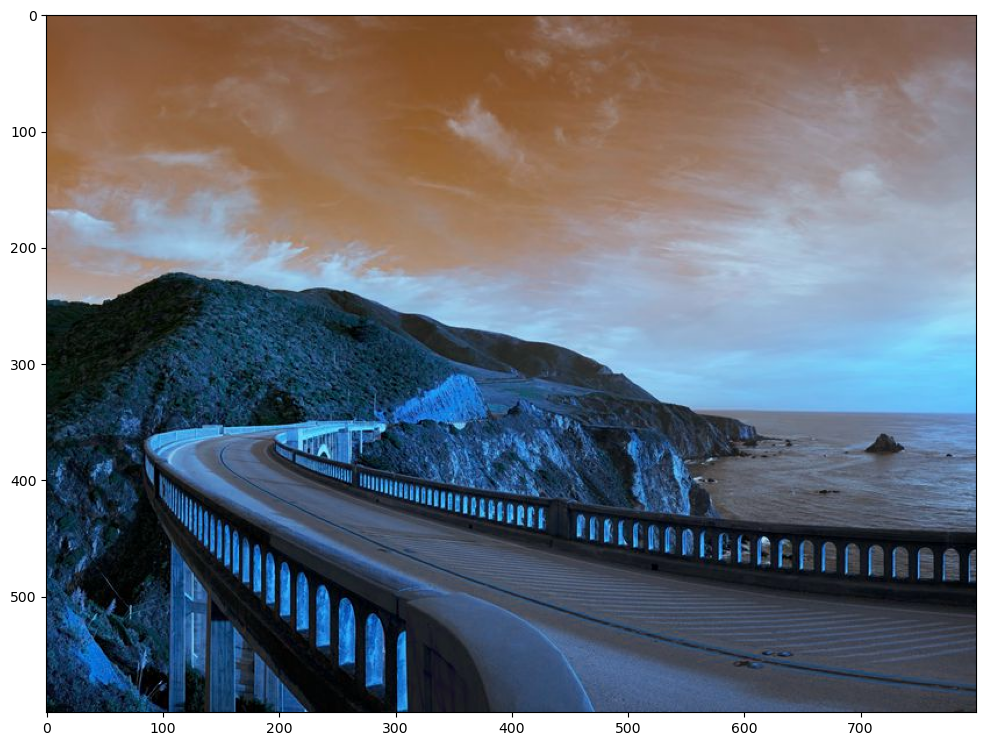

In [12]:
#Custom Seeds Watersheed
road = cv2.imread('../DATA/road_image.jpg')
road_copy = np.copy(road)
display(road)

In [13]:
#Set uo empty img to draw, check the shape of img and make it in np.zeros
road.shape

(600, 800, 3)

In [14]:
marker_image = np.zeros(road.shape[:2], dtype = np.int32)
segments = np.zeros(road.shape, dtype = np.uint8)

In [15]:
from matplotlib import cm

In [16]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [17]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))

In [18]:
n_markers = 10
current_marker = 1
marks_updated = False

def mouse_callback(event, x, y, flags, param):
    global marks_updated 

    if event == cv2.EVENT_LBUTTONDOWN:
        
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)
    
        cv2.circle(road_copy, (x, y), 10, colors[current_marker], -1)
        marks_updated = True


In [19]:
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    
    # SHow the 2 windows
    cv2.imshow('WaterShed Segments', segments)
    cv2.imshow('Road Image', road_copy)
        
        
    # Close everything if Esc is pressed
    k = cv2.waitKey(1)

    if k == 27:
        break
        
    # Clear all colors and start over if 'c' is pressed
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[0:2], dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)

    elif k > 0 and chr(k).isdigit():
        # chr converts to printable digit
        
        current_marker  = int(chr(k))
        
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        
        marks_updated = False
        
cv2.destroyAllWindows()

2025-02-23 18:35:33.363 python[8793:186882] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-23 18:35:33.363 python[8793:186882] +[IMKInputSession subclass]: chose IMKInputSession_Modern
